<a href="https://colab.research.google.com/github/jasonandrewth/Random-Forest-Presentation/blob/main/random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIRO BOARD WITH MACHINE LEARNING FUNDAMENTALS: https://miro.com/app/board/uXjVOe_zgK8=/?invite_link_id=884480570521

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

visualize_classifier() AND DCTree_wPlot() ARE UTIL FUNCTIONS TO VISUALIZE HOW A CLASSIFICATION MODEL PREDICTS:

In [ ]:
#@title
def visualize_classifier(model,X,y, cmap='brg'):
    # Illustrating it is considerably more difficult
    ax = plt.gca()
    #pllot training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',clim=(y.min(), y.max()), zorder=3)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

In [ ]:
#@title
def DCTree_wPlot(model,X,y):
    # Illustrating it is considerably more difficult
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',clim=(y.min(), y.max()), zorder=3)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    model.fit(X, y)

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.2,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

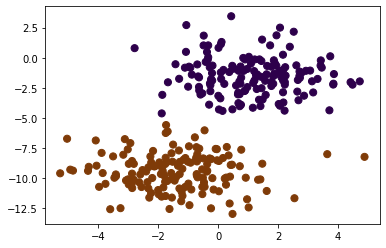

In [ ]:
#lower complexity dataset
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(300, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='PuOr');

In [ ]:
# Arrange Data for testing + training
from sklearn.model_selection import train_test_split
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1, y1, random_state=0, train_size=0.4)

In [ ]:
from sklearn.naive_bayes import GaussianNB   # 1. choose model class
gaussianNB = GaussianNB()                         # 2. instantiate model
gaussianNB.fit(Xtrain1, ytrain1)                  # 3. fit model to data (training)
y_gaussiannb = gaussianNB.predict(Xtest1)             # 4. predict on new data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Accuracy: {accuracy_score(ytest1, y_gaussiannb)}")

print(confusion_matrix(ytest1, y_gaussiannb))

Accuracy: 1.0
[[91  0]
 [ 0 89]]


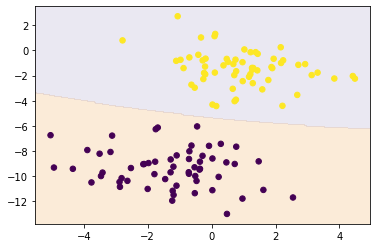

In [ ]:
visualize_classifier(GaussianNB(), Xtrain1, ytrain1, cmap='PuOr')

A SLIGHTLY MORE COMPLEX DATASET WITH 4 LABELS

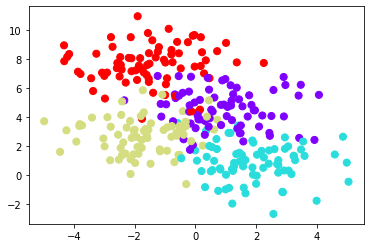

In [ ]:
# more complex dataset
from sklearn.datasets import make_blobs
X_complex, y_complex = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.3)
plt.scatter(X_complex[:, 0], X_complex[:, 1], c=y_complex, s=50, cmap='rainbow');

FIRST A DECISION TREE:

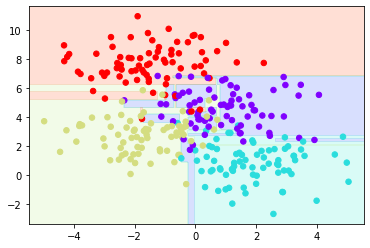

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#increase max_depth of the tree to see potential for overfitting
tree = DecisionTreeClassifier(max_depth=16)
DCTree_wPlot(tree, X_complex, y_complex)

BAGGING: layering overfitted models

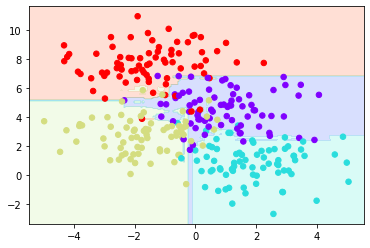

In [ ]:
from sklearn.ensemble import BaggingClassifier

dtree = DecisionTreeClassifier()
bagmdl = BaggingClassifier(dtree, n_estimators=200, max_samples=0.8,
                        random_state=1)
DCTree_wPlot(bagmdl,X_complex, y_complex)

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
Xtrain_complex, Xtest_complex, ytrain_complex, ytest_complex = train_test_split(X_complex, y_complex, test_size=0.7) # 70% training and 30% test

FINALLY, A RANDOM FOREST CLASSIFIER

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create the Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
#Train the model using the training sets 
clf.fit(Xtrain_complex, ytrain_complex)

y_pred_complex = clf.predict(Xtest_complex)

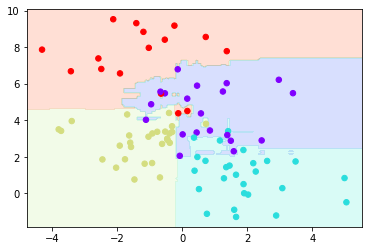

In [ ]:
DCTree_wPlot(clf,Xtrain_complex, ytrain_complex)

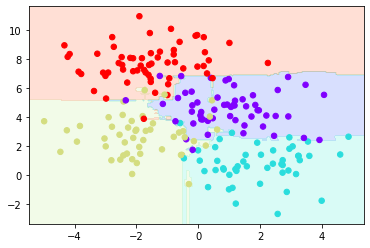

In [ ]:
DCTree_wPlot(clf,Xtest_complex, ytest_complex)

In [ ]:
tree.fit(Xtrain_complex, ytrain_complex)
y_treepred_complex = tree.predict(Xtest_complex)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Random Forest:",metrics.accuracy_score(ytest_complex, y_pred_complex))

Accuracy Random Forest: 0.8666666666666667


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy Tree:",metrics.accuracy_score(ytest_complex, y_treepred_complex))
print(confusion_matrix(ytest_complex, y_treepred_complex))

Accuracy Tree: 0.7666666666666667
[[27  6  9 13]
 [ 2 45  2  0]
 [ 9  1 37  0]
 [ 6  0  1 52]]


TEST IN 64 DIMENSIONAL FEATURE SPACE

The digits dataset is made up of 1797 8×8 images of hand-written digits, transformed into feature vectors with length 64.



In [ ]:
from sklearn import datasets
 
digits = datasets.load_digits()

In [ ]:
print("Labels:", digits.target_names)
print("Features Length:",len(digits.feature_names))

Labels: [0 1 2 3 4 5 6 7 8 9]
Features Length: 64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


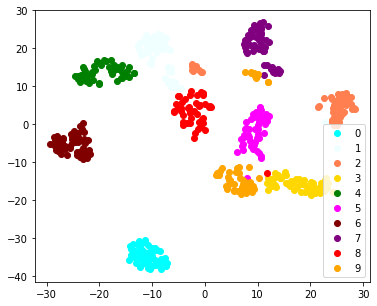

In [ ]:
from sklearn.manifold import TSNE
 
X_digits = digits.data[:500]
y_digits = digits.target[:500]
 
digits = datasets.load_digits()
tsne = TSNE(n_components=2, random_state=0)
 
X_2d = tsne.fit_transform(X_digits)
 
digits_ids = range(len(digits.target_names))
 
plt.figure(figsize=(6, 5))
colors = 'aqua', 'azure', 'coral', 'gold', 'green', 'fuchsia', 'maroon', 'purple', 'red', 'orange'
for i, c, label in zip(digits_ids, colors, digits.target_names):
    plt.scatter(X_2d[y_digits == i, 0], X_2d[y_digits == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [ ]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
Xtrain_digits, Xtest_digits, ytrain_digits, ytest_digits = train_test_split(X_digits, y_digits, test_size=0.7) # 70% training and 30% test

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB   
gaussianNB = GaussianNB()                         
gaussianNB.fit(Xtrain_digits, ytrain_digits)                  
y_digits_bayes = gaussianNB.predict(Xtest_digits) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f"Accuracy Bayes: {accuracy_score(ytest_digits, y_digits_bayes)}")

print(confusion_matrix(ytest_digits, y_digits_bayes))

Accuracy Bayes: 0.7971428571428572
[[32  2  0  0  0  0  1  0  2  0]
 [ 0 31  2  0  1  1  0  0  0  0]
 [ 0  1 24  0  0  0  0  0  5  8]
 [ 0  0  0 31  0  0  0  0  1  2]
 [ 0  2  0  0 27  0  0  1  4  0]
 [ 0  2  1  0  0 30  0  1  1  8]
 [ 0  0  0  0  0  0 29  0  1  0]
 [ 0  2  0  2  1  0  0 27  0  0]
 [ 0  0  3  2  0  1  0  0 25  0]
 [ 0  2  1  3  0  0  0  3  4 23]]


In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create the Classifier
clf2=RandomForestClassifier(n_estimators=84, random_state=0)

In [ ]:
clf2.fit(Xtrain_digits, ytrain_digits)
y_digits_forest = clf2.predict(Xtest_digits) 

In [ ]:
print(f"Accuracy Forest: {accuracy_score(ytest_digits, y_digits_forest)}")

print(confusion_matrix(ytest_digits, y_digits_forest))

Accuracy Forest: 0.9228571428571428
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  1]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 1  0  0  3  0 36  0  0  1  2]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  3  0  0 28  0  1]
 [ 0  0  0  0  0  0  0  3 28  0]
 [ 0  1  0  4  0  0  0  4  0 27]]
